# Unsupervised Learning Final Project

This is the final project for the **Data Science in Python: Unsupervised Learning** course. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters
7. Make Recommendations

## 0. Goal & Scope

**GOAL**: You are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Your task is to use a clustering technique to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

The data can be found in the `employee_data.csv` file.

In [3]:
# read in the employee data
import pandas as pd 
data = pd.read_csv('../Data/employee_data.csv')

data.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [4]:
# note the number of rows and columns
data.shape

(1470, 10)

In [5]:
# view the data types of all the columns
data.dtypes

EmployeeID            int64
Age                   int64
Gender               object
DistanceFromHome      int64
JobLevel              int64
Department           object
MonthlyIncome         int64
PerformanceRating     int64
JobSatisfaction       int64
Attrition            object
dtype: object

In [6]:
# look at the numeric columns
data.select_dtypes(include='number')

,EmployeeID,Age,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,1001,41,1,2,5993,3,4
1,1002,49,8,2,5130,4,2
2,1004,37,2,1,2090,3,3
3,1005,33,3,1,2909,3,3
4,1007,27,2,1,3468,3,2
...,...,...,...,...,...,...,...
1465,3061,36,23,2,2571,3,4
1466,3062,39,6,3,9991,3,1
1467,3064,27,4,2,6142,4,2
1468,3065,49,2,2,5390,3,2


In [7]:
# look at the non-numeric columns
data.select_dtypes(include='object')

,Gender,Department,Attrition
0,Female,Sales,Yes
1,Male,Research & Development,No
2,Male,Research & Development,Yes
3,Female,Research & Development,No
4,Male,Research & Development,No
...,...,...,...
1465,Male,Research & Development,No
1466,Male,Research & Development,No
1467,Male,Research & Development,No
1468,Male,Sales,No


### b. Data Prep: Convert the data types

Use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [8]:
import numpy as np

In [9]:
# create a copy of the dataframe
df_numeric = data.copy()

In [10]:
# look at the gender values
df_numeric.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [11]:
# change gender into a numeric field using np.where
df_numeric['Gender'] = np.where(df_numeric['Gender']=='Female',1,0)
df_numeric['Gender']

0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1470, dtype: int64

In [12]:
# look at the attrition values
df_numeric['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [13]:
# change attrition to a numeric field using np.where
df_numeric['Attrition'] = np.where(df_numeric['Attrition']=='Yes',1,0)
df_numeric['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [14]:
# look at the department values
df_numeric['Department'].value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [15]:
# change department to a numeric field via dummy variables
df_dummies=pd.get_dummies(df_numeric['Department']).astype(int)
df_dummies

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


In [16]:
# attach the columns back on to the dataframe
df_numeric = pd.concat([df_numeric, df_dummies], axis=1)

In [17]:
df_numeric = df_numeric.drop(columns=['Department'])


In [18]:
# view the cleaned dataframe
df_numeric.dtypes

EmployeeID                int64
Age                       int64
Gender                    int64
DistanceFromHome          int64
JobLevel                  int64
MonthlyIncome             int64
PerformanceRating         int64
JobSatisfaction           int64
Attrition                 int64
Human Resources           int64
Research & Development    int64
Sales                     int64
dtype: object

In [19]:
# note the number of rows and columns
df_numeric.shape

(1470, 12)

### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [20]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?
len(df_numeric[df_numeric['Attrition']==1]['Attrition'])/len(df_numeric['Attrition'])

0.16122448979591836

In [21]:
# best practice

df_numeric['Attrition'].mean()

np.float64(0.16122448979591836)

In [22]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
df_numeric.describe()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2024.865306,36.923810,0.400000,9.192517,2.063946,6502.931293,3.153741,2.728571,0.161224,0.042857,0.653741,0.303401
std,602.024335,9.135373,0.490065,8.106864,1.106940,4707.956783,0.360824,1.102846,0.367863,0.202604,0.475939,0.459884
min,1001.000000,18.000000,0.000000,1.000000,1.000000,1009.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1491.250000,30.000000,0.000000,2.000000,1.000000,2911.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.500000,36.000000,0.000000,7.000000,2.000000,4919.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,2555.750000,43.000000,1.000000,14.000000,3.000000,8379.000000,3.000000,4.000000,0.000000,0.000000,1.000000,1.000000
max,3068.000000,60.000000,1.000000,29.000000,5.000000,19999.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#  correct solution

df_numeric.groupby('Attrition').mean()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,,
0,2027.656123,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,2010.345992,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


### d. Data Prep: Remove the Attrition and ID Columns

Exclude the attrition column (to be overlayed onto our clusters later on) and the ID column.

In [24]:
# create a new dataframe without the attrition column for us to model on
df_model = df_numeric.drop(columns=['Attrition'])
df_model

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,0,0,1
1,1002,49,0,8,2,5130,4,2,0,1,0
2,1004,37,0,2,1,2090,3,3,0,1,0
3,1005,33,1,3,1,2909,3,3,0,1,0
4,1007,27,0,2,1,3468,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,3061,36,0,23,2,2571,3,4,0,1,0
1466,3062,39,0,6,3,9991,3,1,0,1,0
1467,3064,27,0,4,2,6142,4,2,0,1,0
1468,3065,49,0,2,2,5390,3,2,0,0,1


In [25]:
# drop the employee column as well before modeling
df_model = df_model.drop(columns=['EmployeeID'])
df_model

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,2571,3,4,0,1,0
1466,39,0,6,3,9991,3,1,0,1,0
1467,27,0,4,2,6142,4,2,0,1,0
1468,49,0,2,2,5390,3,2,0,0,1


In [26]:
# note the number of rows and columns in the dataframe
df_model.shape

(1470, 10)

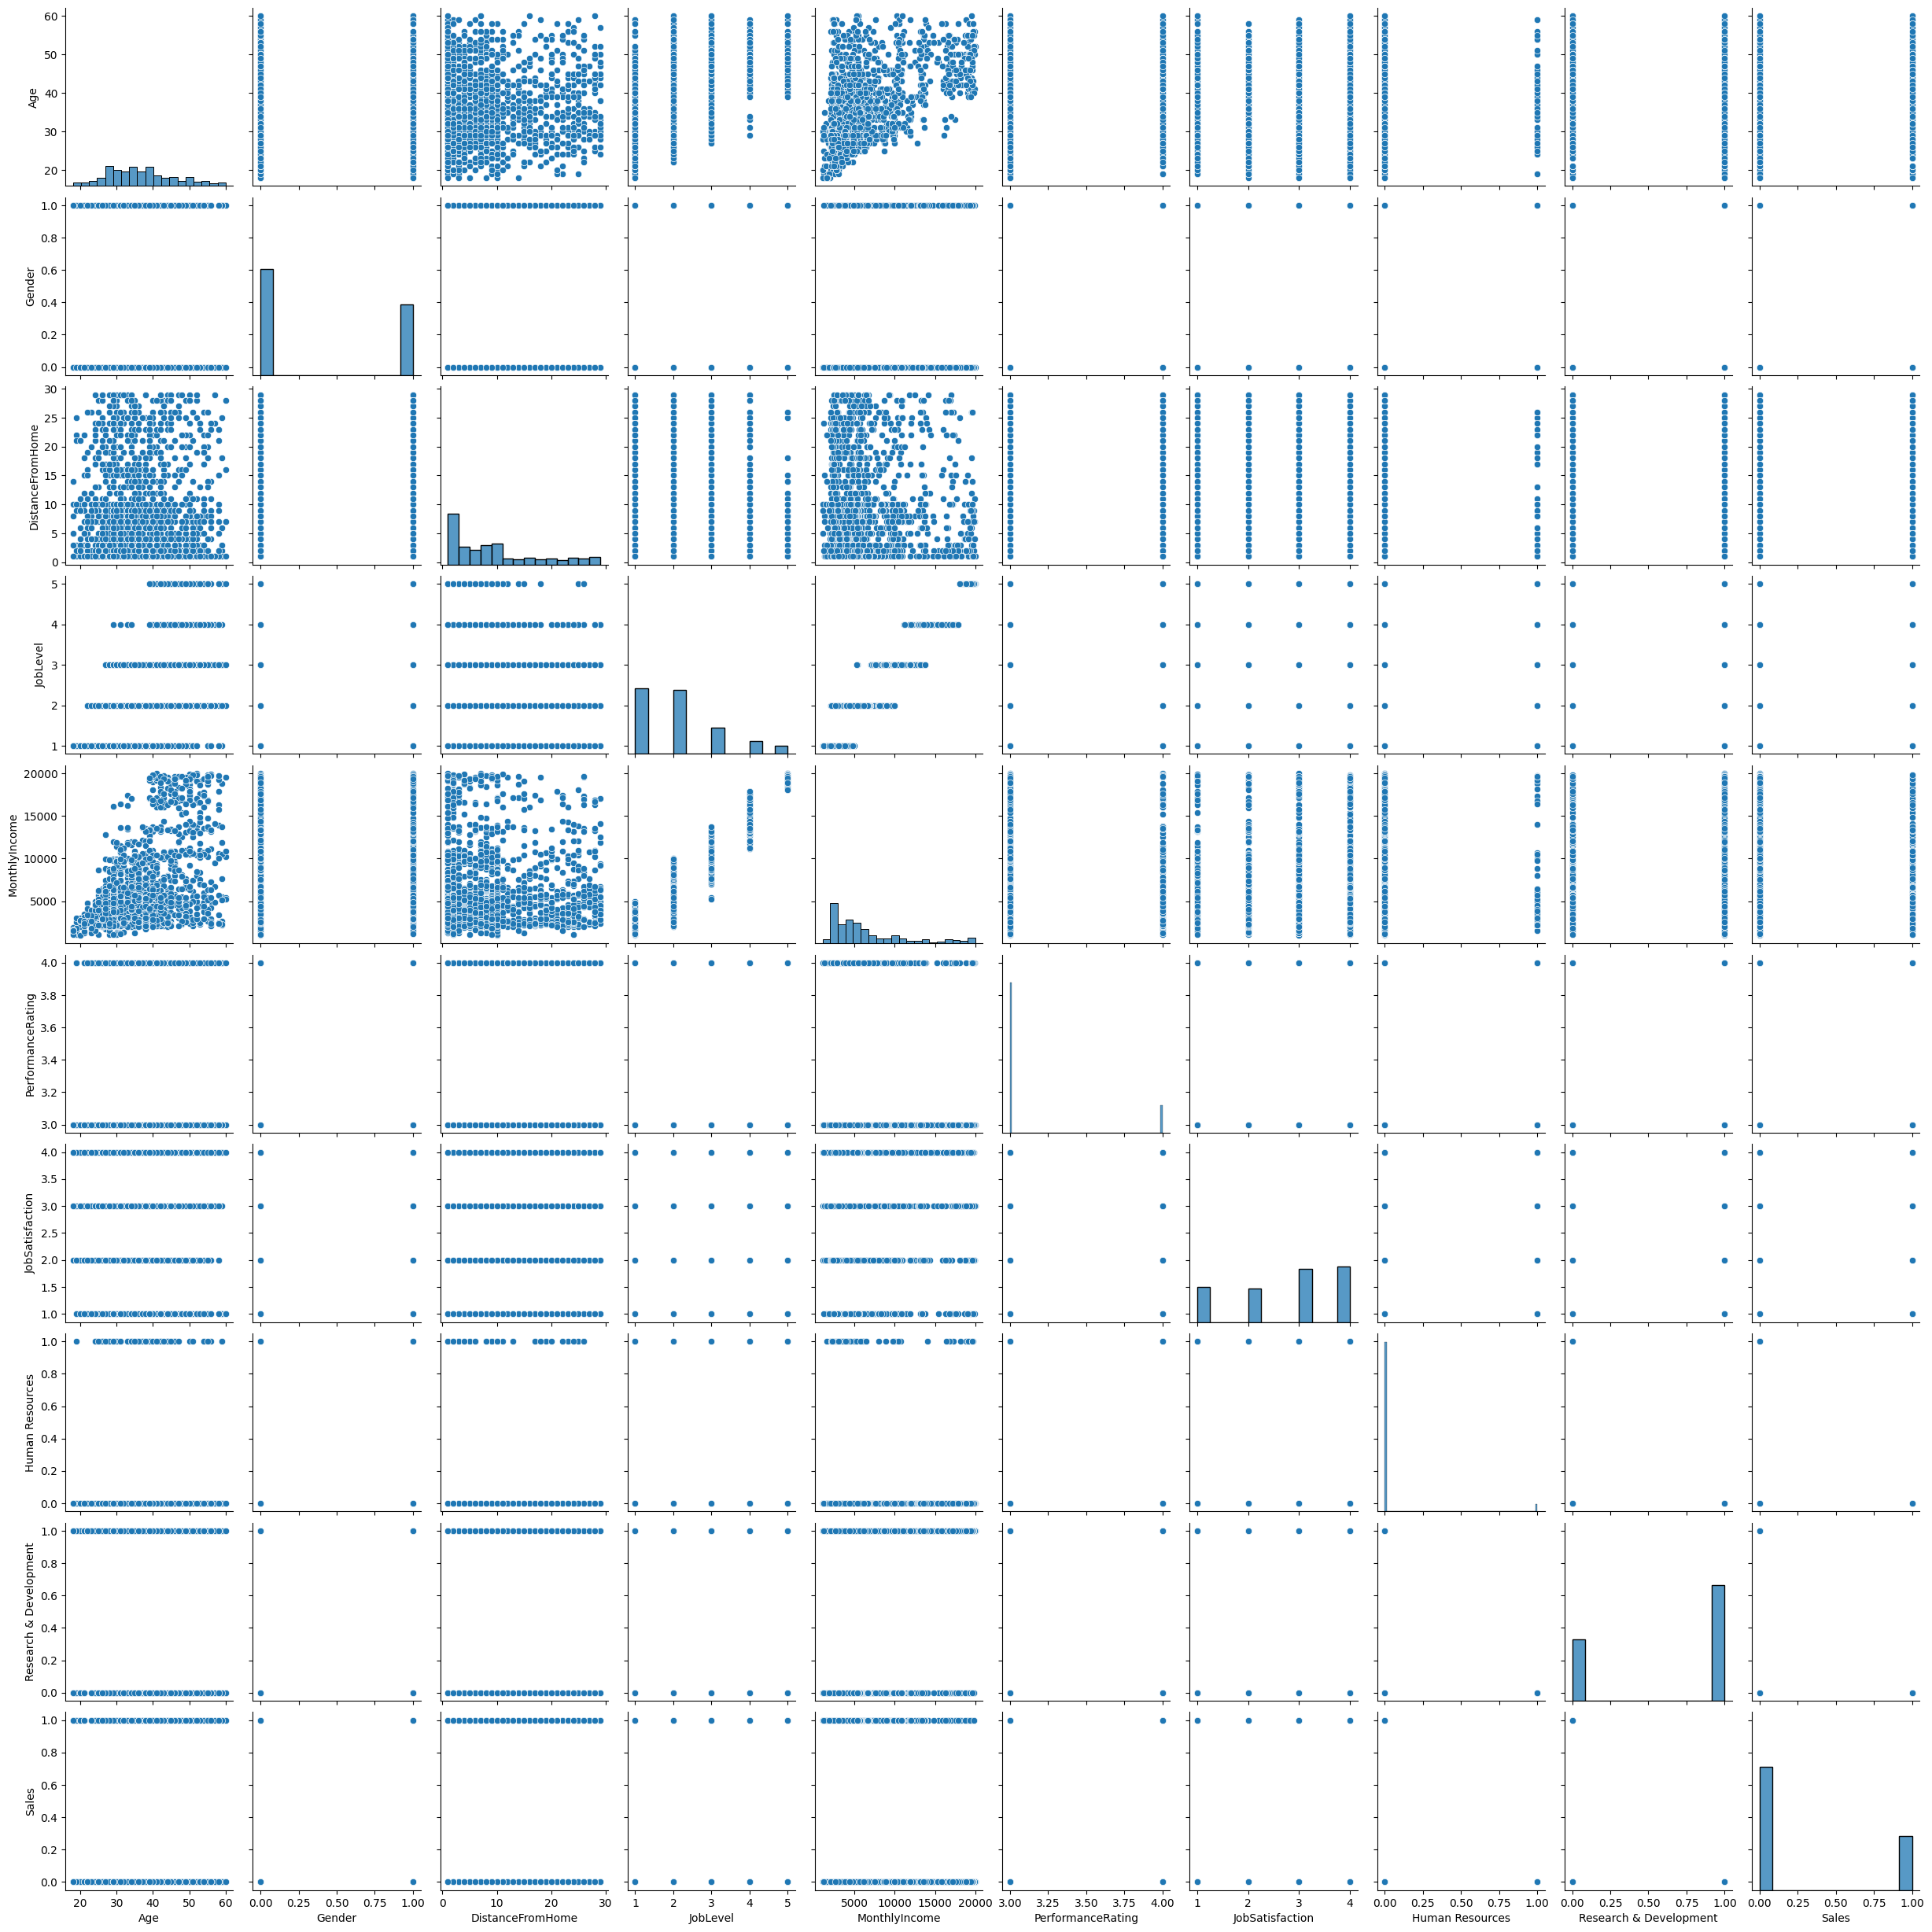

In [27]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
import seaborn as sns

sns.pairplot(df_model)

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [28]:
# scale the data using standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_std = pd.DataFrame(std.fit_transform(df_model), columns=df_model.columns)
data_std


,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960
...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.816497,1.703764,-0.057788,-0.835451,-0.426230,1.153254,-0.211604,0.727775,-0.659960
1466,0.227347,-0.816497,-0.393938,0.845911,0.741140,-0.426230,-1.567907,-0.211604,0.727775,-0.659960
1467,-1.086676,-0.816497,-0.640727,-0.057788,-0.076690,2.346151,-0.660853,-0.211604,0.727775,-0.659960
1468,1.322365,-0.816497,-0.887515,-0.057788,-0.236474,-0.426230,-0.660853,-0.211604,-1.374051,1.515244


In [29]:
# double check that all the column means are 0 and standard deviations are 1
data_std.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [30]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
inertia_values =[]

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(data_std)
    inertia_values.append(kmeans.inertia_)


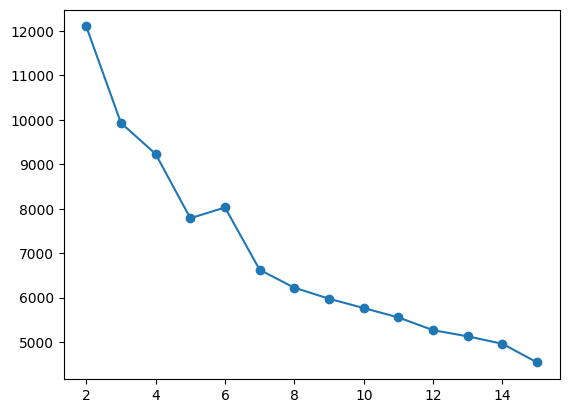

In [31]:
# plot the inertia values
import matplotlib.pyplot as plt

inertia_series = pd.Series(inertia_values, index= range(2,16))
inertia_series.plot(marker= 'o')
plt.show()

In [ ]:
# plot the silhouette scores
from sklearn.metrics import silhouette_score


silhouette_scores =[]

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(data_std)
    silhouette_scores.append(silhouette_score(data_std, kmeans.labels_, metric='euclidean', sample_size=None))



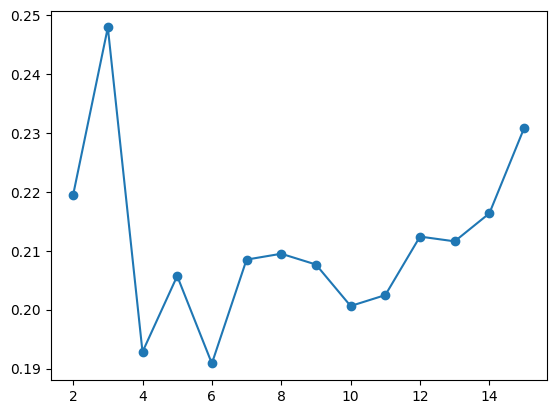

In [33]:

silhouette_series = pd.Series(silhouette_scores, index= range(2,16))
silhouette_series.plot(marker= 'o')
plt.show()

### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [34]:
# fit a kmeans model for the k value that you identified
# k = 3 or k = 5
kmeans_3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_3.fit(data_std)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [35]:
# find the number of employees in each cluster
from collections import Counter

Counter(kmeans_3.labels_)

Counter({np.int32(0): 795, np.int32(1): 405, np.int32(2): 270})

In [36]:
# create a heat map of the cluster centers
cluster_centers_df = pd.DataFrame(kmeans_3.cluster_centers_, columns=data_std.columns)

In [37]:
cluster_centers_df

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,-0.246473,-0.046217,-0.006837,-0.549991,-0.537471,0.020141,-0.010513,0.080294,0.603516,-0.659960
1,-0.173079,0.035281,0.039008,-0.015392,-0.112548,-0.049734,0.033435,-0.211604,-1.374051,1.515244
2,0.985343,0.083162,-0.038380,1.642505,1.751375,0.015297,-0.019197,0.080984,0.284056,-0.329651


<Axes: >

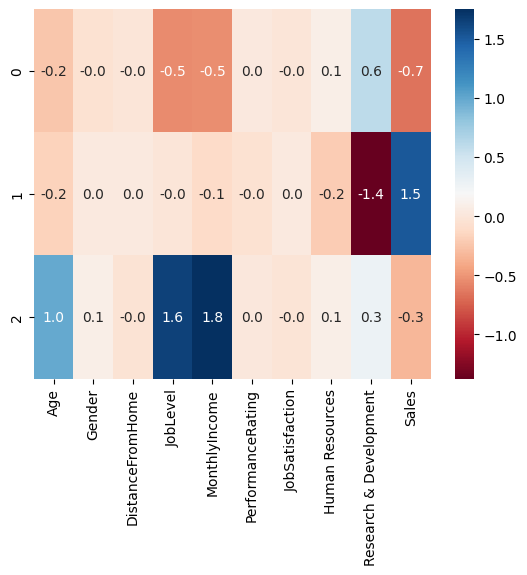

In [38]:
sns.heatmap(cluster_centers_df, annot=True, cmap='RdBu', fmt='.1f')

In [39]:
# interpret the clusters
# cluster0: likely juniors
# cluster1: sales people
# cluster2: seniors

## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [40]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(data_std)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [41]:
# view the explained variance ratio
pca2.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [42]:
# view the components
pca2.components_

array([[ 0.43287352,  0.04877625, -0.00285089,  0.60509274,  0.59445012,
        -0.02556521, -0.00472736,  0.02964393, -0.21392918,  0.20833797],
       [ 0.21384802, -0.00840873, -0.01653328,  0.14533326,  0.17730123,
         0.04153184, -0.01140416, -0.11374447,  0.67887246, -0.65246219]])

In [43]:
# view the columns
data_std.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction', 'Human Resources',
       'Research & Development', 'Sales'],
      dtype='object')

In [45]:
# # interpret the components
# component1: age, joblevel, monthlyincome = seniorish
# component2: lower: sales, higher : r&d  

### b. Overlay the K-Means cluster colors

In [46]:
# transform the data
data_std_transformed =  pd.DataFrame(pca2.transform(data_std), columns=['PC1', 'PC2'])
data_std_transformed

,PC1,PC2
0,0.765263,-1.853973
1,-0.031684,1.285674
2,-1.462588,0.645564
3,-1.449531,0.563547
4,-1.758252,0.473654
...,...,...
1465,-0.914088,0.718419
1466,0.730984,1.265253
1467,-0.945263,0.816790
1468,0.976963,-1.653543


Text(0, 0.5, '<--Sales    Research-->')

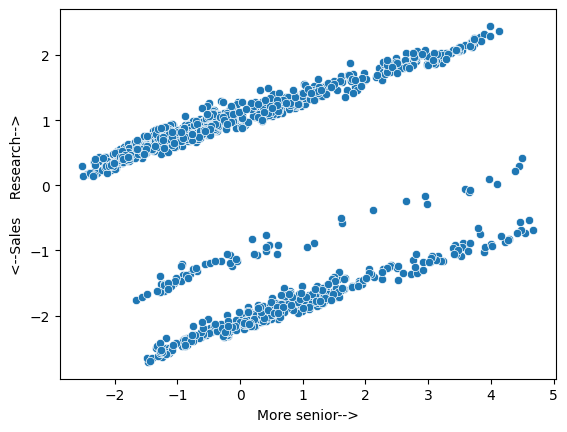

In [47]:
# plot the data
import matplotlib.pyplot as plt
sns.scatterplot(x = 'PC1', y='PC2', data=data_std_transformed)
plt.xlabel('More senior-->')
plt.ylabel('<--Sales    Research-->')

<Axes: xlabel='PC1', ylabel='PC2'>

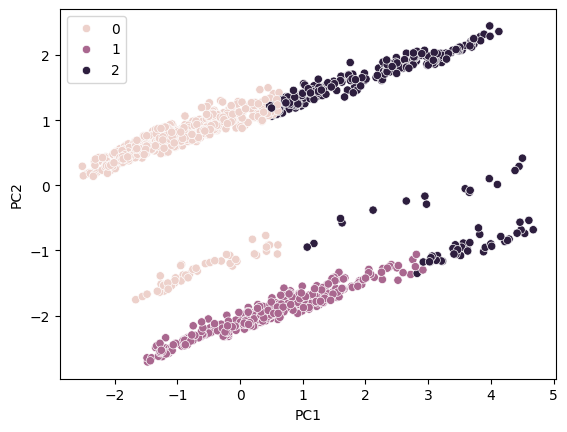

In [48]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)
sns.scatterplot(x='PC1', y = 'PC2', data = data_std_transformed, hue=kmeans_3.labels_)

### c. Overlay the Department colors instead

<Axes: xlabel='PC1', ylabel='PC2'>

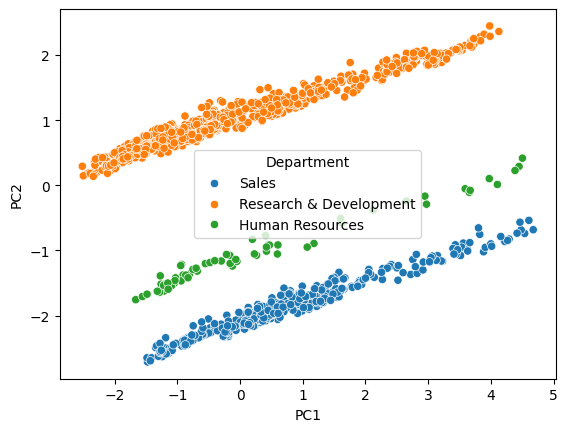

In [49]:
# overlay the department colors (hint: set the hue to be the department column)
sns.scatterplot(x='PC1', y = 'PC2', data = data_std_transformed, hue=data['Department'])

## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [ ]:
# create a new dataframe that excludes the three department columns from the scaled dataframe


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [ ]:
# write a loop to fit models with 2 to 15 clusters


In [ ]:
# plot the inertia values


In [ ]:
# plot the silhouette scores


### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k = [some value]

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


#### ii. k = [another value]

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


#### iii. k = [another value]

In [ ]:
# fit a kmeans model for the k value that you identified


In [ ]:
# find the number of employees in each cluster


In [ ]:
# create a heat map of the cluster centers


In [ ]:
# interpret the clusters


## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [ ]:
# fit a PCA model with 2 components


In [ ]:
# view the explained variance ratio


In [ ]:
# view the components


In [ ]:
# view the columns


In [ ]:
# interpret the components


### b. Overlay the K-Means cluster colors

In [ ]:
# transform the data


In [ ]:
# plot the data


In [ ]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)


### c. OPTIONAL: Create a 3D plot

In [ ]:
# fit a PCA model with 3 components


In [ ]:
# view the explained variance ratio


In [ ]:
# view the components


In [ ]:
# view the columns


In [ ]:
# interpret the components


In [ ]:
# transform the data


In [ ]:
# create a 3d scatter plot


## 6. EDA on Clusters

Let's decide to go with the 6 clusters without department data.

### a. Confirm the 6 clusters

In [ ]:
# fit a kmeans model with 6 clusters


In [ ]:
# view the cluster labels


### b. Create a dataframe with the cluster labels and names

In [ ]:
# create a dataframe with two columns - one of the label and another of the cluster name

# create a mapping for the cluster names

# combine the labels and names into a single dataframe


### c. View the attrition rates for each cluster

In [ ]:
# combine the clusters and attrition data


In [ ]:
# what is the attrition rate for each cluster?


In [ ]:
# sort the values


In [ ]:
# interpret the findings


In [ ]:
# find the number of employees in each cluster


### d. View the department breakdown for each cluster

In [ ]:
# combine the clusters and department data


In [ ]:
# what is the attrition rate for each cluster + department combination?


In [ ]:
# sort the values


In [ ]:
# interpret the findings


In [ ]:
# find the number of employees in each cluster + department combo


## 7. Make Recommendations

In [ ]:
# looking at the clusters, what segment info would you share with the team?


In [ ]:
# what recommendations would you suggest to retain employees in each cluster?
